In [ ]:
import pandas as pd
from google.colab import files
##UPLOAD second step cleaning.csv
uploaded = files.upload()


Saving second step cleaning.csv to second step cleaning.csv


In [ ]:
df = pd.read_csv('second step cleaning.csv')
df.head()


<ipython-input-3-f3307c9bcdbd>:1: DtypeWarning:

Columns (15,18,20) have mixed types. Specify dtype option on import or set low_memory=False.



,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,type,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source,dt_difference
0,2022-01-01 15:35:00,1/31/22 15:35,2022-01-03 03:48:00,ONTIME,Closed,Case Closed. Closed date : 2022-01-03 08:48:06...,Heat - Excessive Insufficient,Inspectional Services,Housing,Heat - Excessive Insufficient,...,Allston / Brighton,15,21,2104,25 Gardner St,2134.0,42.353400,-71.130351,Constituent Call,1 days 12:13:00
1,2022-01-02 07:42:00,1/4/22 3:30,2022-01-02 09:20:00,ONTIME,Closed,Case Closed. Closed date : Sun Jan 02 14:20:21...,Pick up Dead Animal,Public Works Department,Street Cleaning,Pick up Dead Animal,...,Allston / Brighton,15,22,2202,7 Appian Way,2134.0,42.360731,-71.132974,Constituent Call,0 days 01:38:00
2,2022-01-02 11:31:00,1/4/22 3:30,2022-01-03 11:48:00,ONTIME,Closed,Case Closed. Closed date : Mon Jan 03 16:48:23...,Requests for Street Cleaning,Public Works Department,Street Cleaning,Requests for Street Cleaning,...,Allston / Brighton,15,21,2106,17A Gordon St,2134.0,42.353227,-71.140910,Citizens Connect App,1 days 00:17:00
3,2022-01-04 03:31:00,1/6/22 3:31,2022-01-05 07:25:00,ONTIME,Closed,Case Closed. Closed date : Wed Jan 05 12:25:24...,Unsanitary Conditions - Establishment,Inspectional Services,Health,Unsanitary Conditions - Establishment,...,Allston / Brighton,15,21,2104,44 Harvard Ave,2134.0,42.354520,-71.132281,Constituent Call,1 days 03:54:00
4,2022-01-05 06:57:00,1/6/22 6:57,2022-01-06 04:07:00,ONTIME,Closed,Case Closed. Closed date : Thu Jan 06 09:07:29...,Missed Trash: District 04,Public Works Department,Sanitation,Missed Trash/Recycling/Yard Waste/Bulk Item,...,Allston / Brighton,15,21,2104,460 Cambridge St,2134.0,42.353817,-71.136133,Constituent Call,0 days 21:10:00


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
df = pd.read_csv('second step cleaning.csv')
df_rnd = pd.read_csv('second step cleaning.csv')
##rounds lat/long so that we can identify the number of calls from a specific location
def apply_round_lat(x):
    return round(x['latitude'],3)
def apply_round_lon(x):
    return round(x['longitude'],3)
df_rnd['latitude'] = df_rnd.apply(apply_round_lat, axis=1)
df_rnd['longitude'] = df_rnd.apply(apply_round_lon, axis=1)
df_rnd.head()
unq_hood = df.neighborhood.unique()
arr_unq_pops = [68691, 16212, 7631, 10131, 20504, 2195, 95500, 16356, 40508, 40898, 36480, 36883, 37468, 17811, 36647, 59626, 33688, 3791, 38600, 30446]
#Groups and counts the number of calls from each lat/long count
df_num = df_rnd.groupby(['latitude','longitude', 'neighborhood']).size().reset_index().rename(columns={0:'count'})
#calculates the ratio of calls to population
idx = 0
for neighborhood in unq_hood:
    df_num.loc[df_num['neighborhood'] == neighborhood, 'ratio'] = df_num['count']/arr_unq_pops[idx]
    idx += 1
fig = px.density_mapbox(df_num, lat='latitude', lon='longitude', z='ratio', radius=10, center=dict(lat=42.32, lon=-71.1), zoom=10.3,mapbox_style="stamen-terrain")
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"]
        }
      ])
fig.show()

<ipython-input-2-b173781305f7>:5: DtypeWarning: Columns (15,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('second step cleaning.csv')
<ipython-input-2-b173781305f7>:6: DtypeWarning: Columns (15,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rnd = pd.read_csv('second step cleaning.csv')


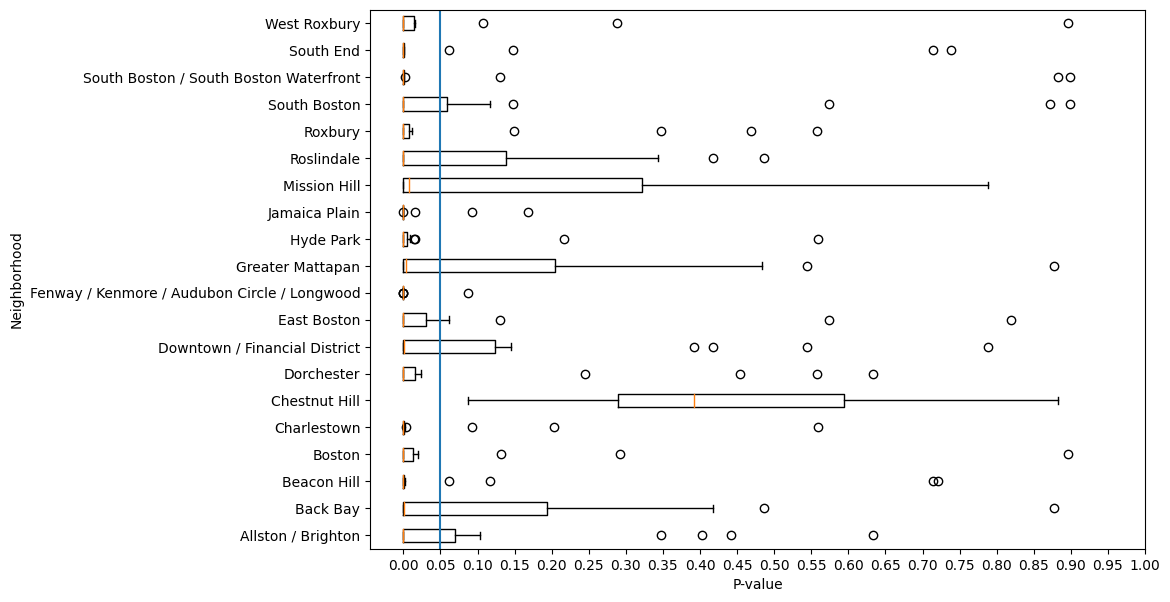

In [ ]:
import scipy.stats
import matplotlib.pyplot as plt
unq_neighborhood = df.neighborhood.unique()
nhood_comb = []
for item1 in unq_neighborhood:
    for item2 in unq_neighborhood:
        if item2 != item1:
            nhood_comb.append([item1, item2])
df.loc[df['on_time'] == 'ONTIME', 'on_time'] = 1
df.loc[df['on_time'] == 'OVERDUE', 'on_time'] = 0
sig_val = []
for item in nhood_comb:
    df1 = df.loc[df['neighborhood'] == item[0]]
    df2 = df.loc[df['neighborhood'] == item[1]]
    is_sig = scipy.stats.ttest_ind(df1['on_time'].tolist(), df2['on_time'].tolist())
    sig_val.append([is_sig, item])
clean_arr = []
for item in sig_val:
    sigq = True
    if item[0][1] > 0.05:
        sigq = False
    else:
        sigq = True
    clean_arr.append([item[0][1], sigq, item[1][0]])
df3 = pd.DataFrame(clean_arr, columns = ['p_val', 'Stat sig?', 'neighborhood'])
p_val_arr = []
for neighborhood in df3.neighborhood.unique():
    df_t = df3.loc[df3['neighborhood'] == neighborhood]
    t_arr = df_t.p_val.to_list()
    p_val_arr.append(t_arr)
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(p_val_arr, vert = 0)
ax.set_yticklabels(df3.neighborhood.unique())
'''for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)'''
plt.xticks([0,0.05,0.1,0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
plt.axvline(x = 0.05)
plt.xlabel("P-value")
plt.ylabel("Neighborhood")
plt.show()